In [11]:
from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
df = pd.read_csv('./Waterfall-Chart-Data-Single.csv')
df

,Particulars,Company A
0,Revenue,15203
1,Cost of Goods,-4220
2,Employee Expenses,-1002
3,Income from Interest,52
4,Loan Payment,-13
5,Net Income,10020


In [7]:
def get_data(df: pd.DataFrame) -> Dict[str, List[int]]:
    """Given a dataframe, transforms it to a dictionary which will be used for
    rendering a stacked bar chart.
    
    Args:
        df(pd.DataFrame): Dataframe which contains data for the chart
    
    Returns:
        Dict, which will be used for rendering a stacked bar chart
    """
    row_count = len(df.index)
    # Underscore is pre-pended to Base to ensure that it doesn't show up in the
    # lengend box
    data = {
        '_Base': [] * row_count,
    }
    # Since we have only 1 column, we are extracting the 2nd element
    column = df.columns[1]
    for change in ['Up', 'Down']:
        data[column + ' ' + change] = [] * row_count

    for key in data:
        data[key] = [0] * row_count
    
    for idx, value in enumerate(df[column]):
        if value >= 0:
            data[column + ' Up'][idx] = df.loc[idx, column]
        else:
            data[column + ' Down'][idx] = df.loc[idx, column]

    # calculate base
    prev = df.loc[0, column]
    # Base for last will always be 0
    for i in range(row_count - 1):
        delta = 0
        cur = df.loc[i, column]
        if prev <= 0 and cur < 0:
            delta = cur
        elif prev < 0:
            delta = 0
        elif prev > 0 and cur < 0:
            delta = cur + prev
        else:
            delta = prev
        # ignore the calculation for first as it will always be 0
        data['_Base'][i] = 0 if i == 0 else data['_Base'][i - 1] + delta
        prev = cur
    return data

In [8]:
data = get_data(df)
data

{'_Base': [0, 10983, 9981, 9981, 10020, 0],
 'Company A Up': [15203, 0, 0, 52, 0, 10020],
 'Company A Down': [0, -4220, -1002, 0, -13, 0]}

In [17]:
def render_chart(data: Dict[str, List[int]], df: pd.DataFrame) -> None:
    """Given data and df, it renders a stacked bar (waterfall) chart using the
    data.
    
    Args:
        data(Dict[str, List[int]]): Data which will be used for rendering the
            chart
        df(pd.DataFrame): Dataframe for some auxiliary operations
    
    Returns:
        None
    """
    # get the first column
    particular_names = df.iloc[:,0]
    X_AXIS = [particular for particular in particular_names]

    index = pd.Index(X_AXIS, name='Particulars')
    colors = ['#ffffff00', '#00ff00', '#ff0000']
    df_for_plotting = pd.DataFrame(data, index=index).abs()
    ax = df_for_plotting.plot(
        kind='bar',
        stacked=True,
        figsize=(15, 6),
        color=colors
    )
    ax.set_ylabel('Amount')

    row_count = len(X_AXIS)
    # ignore the base texts
    for p in ax.patches[row_count:]:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height:
            ax.text(
                x + width / 2, 
                y + height / 2, 
                int(height),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
            )

    plt.xticks(rotation=30)
    plt.legend(title='Labels', bbox_to_anchor=(1.0, 1), loc='best')
    plt.tight_layout()
    plt.show()

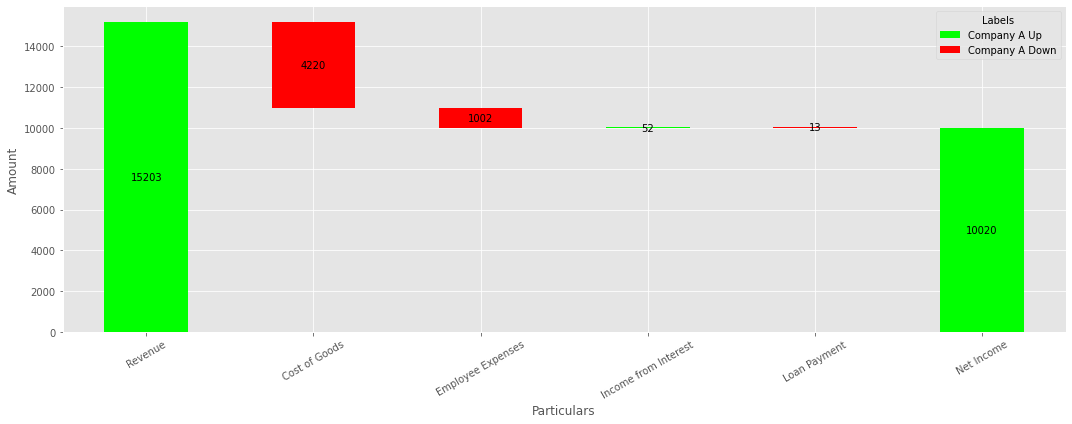

In [18]:
render_chart(data, df)

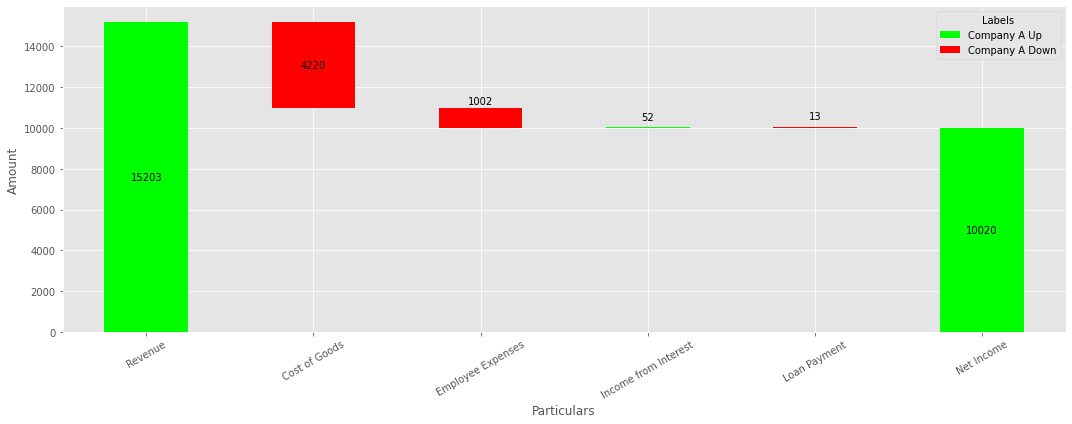

In [22]:
def render_chart(data: Dict[str, List[int]], df: pd.DataFrame) -> None:
    """Given data and df, it renders a stacked bar (waterfall) chart using the
    data.
    
    Args:
        data(Dict[str, List[int]]): Data which will be used for rendering the
            chart
        df(pd.DataFrame): Dataframe for some auxiliary operations
    
    Returns:
        None
    """
    # get the first column
    particular_names = df.iloc[:,0]
    X_AXIS = [particular for particular in particular_names]

    index = pd.Index(X_AXIS, name='Particulars')
    colors = ['#ffffff00', '#00ff00', '#ff0000']
    df_for_plotting = pd.DataFrame(data, index=index).abs()
    ax = df_for_plotting.plot(
        kind='bar',
        stacked=True,
        figsize=(15, 6),
        color=colors
    )
    ax.set_ylabel('Amount')

    row_count = len(X_AXIS)
    y_min, y_max = ax.get_ylim()
    max_height = y_max - y_min
    height_limit = max_height * 0.1
    # ignore the base texts
    for p in ax.patches[row_count:]:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height:
            height_offset = 0
            if height < height_limit:
                height_offset = max(max_height / 30, height * 5 / 6)
            ax.text(
                x + width / 2, 
                y + height / 2 + height_offset, 
                int(height),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
            )

    plt.xticks(rotation=30)
    plt.legend(title='Labels', bbox_to_anchor=(1.0, 1), loc='best')
    plt.tight_layout()
    plt.show()
    
render_chart(data, df)